# Lasso Regression

`lasso is more important than ridge`

`lasso is also used for feature selection`

Lasso Regression, which stands for `Least Absolute Shrinkage and Selection Operator`, is a type of linear regression that uses shrinkage. Shrinkage here means that the data values are shrunk towards a central point, like the mean. The lasso technique encourages simple, sparse models (i.e., models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

### Key Features of Lasso Regression:

1. **Regularization Term**: The key characteristic of Lasso Regression is that it adds an L1 penalty to the regression model, which is the absolute value of the magnitude of the coefficients. The cost function for Lasso regression is:

   $$ \text{Minimize } \sum_{i=1}^{n} (y_i - \sum_{j=1}^{p} x_{ij} \beta_j)^2 + \lambda \sum_{j=1}^{p} |\beta_j| $$

   where $ \lambda $ is the regularization parameter.

2. **Feature Selection**: One of the advantages of lasso regression over ridge regression is that it can result in sparse models with few coefficients; some coefficients can become exactly zero and be eliminated from the model. This property is called automatic feature selection and is a form of embedded method.

3. **Parameter Tuning**: The strength of the L1 penalty is determined by a parameter, typically denoted as alpha or lambda. Selecting a good value for this parameter is crucial and is typically done using cross-validation.

4. **Bias-Variance Tradeoff**: Similar to ridge regression, lasso also manages the bias-variance tradeoff in model training. Increasing the regularization strength increases bias but decreases variance, potentially leading to better generalization on unseen data.

5. **Scaling**: Before applying lasso, it is recommended to scale/normalize the data as lasso is sensitive to the scale of input features.

### Implementation in Scikit-Learn:

Lasso regression can be implemented using the `Lasso` class from Scikit-Learn's `linear_model` module. Here's a basic example:

MSE of Linear Regression: 0.011183765115093785
MSE of Lasso: 0.3847492638484584
MSE of Ridge: 0.050908661852273294
Coefficient from lasso: 
[ 0.         89.60368016 80.04276463 22.4804635  38.76243246 84.78197701
  1.29136322 -0.         25.77911031 52.51232142 -0.          5.76443038
  0.         -0.         38.42253024]


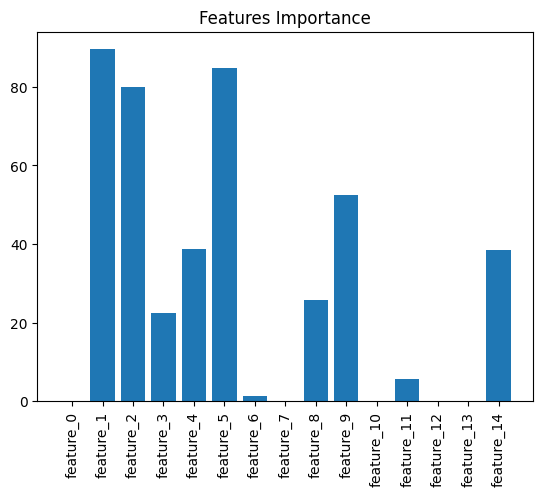

In [2]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate some regression data
X, y = make_regression(n_samples=1000, n_features=15, noise=0.1, random_state=42)
feature_columns=[f"feature_{i}" for i in range(X.shape[1])]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression object
lr = LinearRegression()
lasso = Lasso(alpha=0.2)
ridge = Ridge(alpha=1.0)

# Fit the model
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
# Evaluate the model
print("MSE of Linear Regression:", mean_squared_error(y_test, y_pred_lr))
print("MSE of Lasso:", mean_squared_error(y_test, y_pred_lasso))
print("MSE of Ridge:", mean_squared_error(y_test, y_pred_ridge))

# Check importance of features using Lasso
print("Coefficient from lasso: ")
print(lasso.coef_)

plt.title("Features Importance")
plt.bar(feature_columns, lasso.coef_)
plt.xticks(rotation=90)
plt.show()

# Most important features in our datasets are: feature_1, feature_2, feature_3, feature_4, feature_5, feature_8, feature_9, feature_14

In this example, `alpha` is the parameter that controls the amount of L1 regularization applied to the model. Fine-tuning `alpha` through techniques like cross-validation is a common practice to find the best model.

In [3]:
import numpy as np
x = np.arange(1, 10, 0.01)
len(x)

900

## GridSearchCV

- If `cv(cross validate)` value is 5, then it means: take 5 different training and testing datasets.
- `train_test_split` only take 1 training and testing dataset or we need to manually define 5 different training/testing datasets.


Below image represents that:

- Value of `cv` is 5.
- Green color is for testing and yellow color is for training data.

<img src='../0_resources/images/GridSearchCV.png' />

In [ ]:
%%time
# Fine tune alpha value using cv
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge
import numpy as np

# Create a Lasso regression object
lasso = Lasso()

# Create a dictionary for the grid search key and values
param_grid = {'alpha': np.arange(1, 10, 0.01)}
# param_grid = {"lassoModel__alpha": [3, 5, 10, None]} # If we use pipeline and pass paramaters to GridSearchCv then we need to use model name with double underscore for defining parameters


# Use "grid search cross validation" to find the best value for alpha
lasso_cv = GridSearchCV(lasso, param_grid, cv=10, 
            # n_jobs=-2 # means use all available cores for parallel processing.
            ) 
# total values are 900 from param_grid, from which 1 value will be selected for alpha. 
# cv(Cross Validate) means run the model for 10 different splits of the data. 
# Now we have 10 different training/testing datasets and 900 values for alpha. Hence, 900 * 10 = 9000 iterations

# Fit the model
lasso_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_)) # best_params_ will give the best value of alpha
print("Best score is {}".format(lasso_cv.best_score_))

# Create a Ridge regression object
ridge = Ridge()

# Create a dictionary for the grid search key and values
param_grid = {'alpha': np.arange(1, 10, 0.01)}

# Use grid search to find the best value for alpha
ridge_cv = GridSearchCV(ridge, param_grid, cv=10, 
                # n_jobs=-2
                )

# Fit the model
ridge_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Lasso Regression Parameters: {'alpha': np.int64(1)}
Best score is 0.9995945087010266
R2 Score is 0.9995987995122692
Tuned Ridge Regression Parameters: {'alpha': np.float64(1.0)}
Best score is 0.9999981195099323
CPU times: user 7.04 s, sys: 4.02 ms, total: 7.04 s
Wall time: 7.05 s


## RandomizedSearchCV

- RandomSearchCV is selecting a few datasets from GridSearchCV.
- It is used when we have low processing power.

Below image represents that:

- Value of `cv` is 5.
- Green color is for testing and yellow color is for training data.

<img src='../0_resources/images/RandomSearchCV.png' />

In [ ]:
%%time
# Fine tune alpha value using cv
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge
import numpy as np

# Create a Lasso regression object
lasso = Lasso()

# Create a dictionary for the grid search key and values
param_grid = {'alpha': np.arange(1, 10, 0.01)}

# Use grid search to find the best value for alpha
lasso_cv = RandomizedSearchCV(lasso, param_grid, cv=10,
            # n_jobs=-2
            )

# Fit the model
lasso_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_))
print("Best score is {}".format(lasso_cv.best_score_))

# Create a Ridge regression object
ridge = Ridge()

# Create a dictionary for the grid search key and values
param_grid = {'alpha': np.arange(1, 10, 0.01)}

# Use grid search to find the best value for alpha
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=10, 
                # n_jobs=-2
                )

# Fit the model
ridge_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

Randomized Search CV or Grid Search CV can be used to find the best value of `alpha` for the Lasso model.

# Assignment Alert: Find out what is L1 or L2 regularization?

---